In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

import sys
import os
import nibabel as nib
import glob
import shutil
from matplotlib import pyplot as plt
import numpy as np

<Figure size 432x288 with 0 Axes>

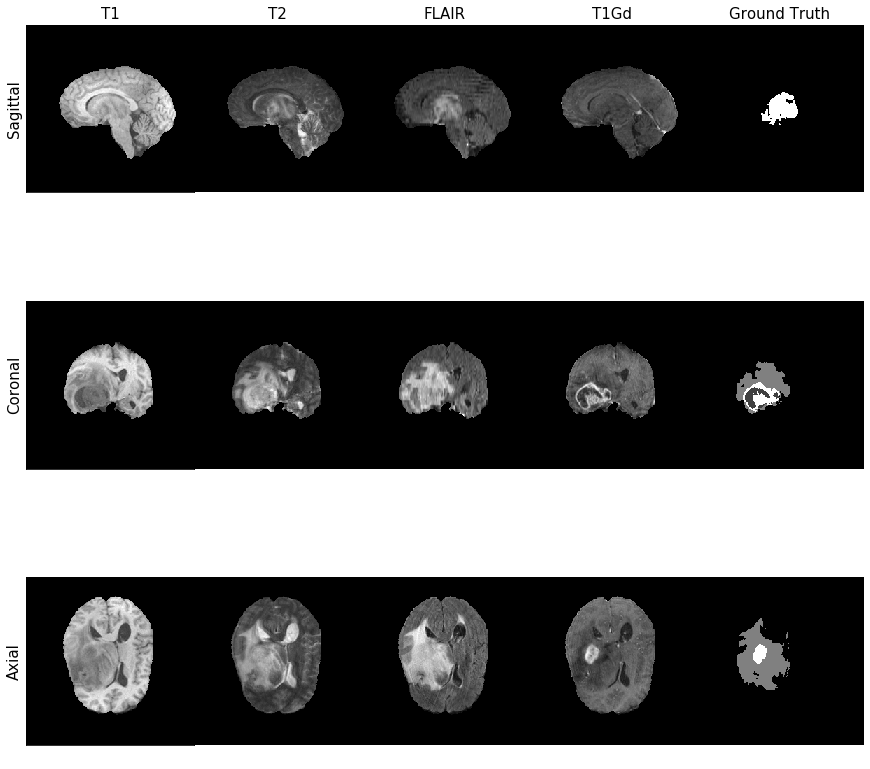

In [2]:

FONTSIZE=15
plt.figure()
fig, axs = plt.subplots(3, 5,figsize=(15,15))

plt.subplots_adjust(left=None, bottom=None, right=None, top=None,
                wspace=0, hspace=0.05)

img = nib.load('data/MICCAI_BraTS_2019_Data_Training/HGG/BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_t1.nii.gz').get_data()
dim = img.shape

ax = axs[0,0]
ax.imshow(np.pad(np.rot90(img[round(dim[0]/2),:,:]),((42,43),(0,0)),'constant',constant_values=0), 
                cmap=plt.cm.gray)
ax.set_title('T1',fontsize=FONTSIZE)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Sagittal',fontsize=FONTSIZE)

ax = axs[1,0]
ax.imshow(np.pad(np.rot90(img[:,round(dim[1]/2),:]),((42,43),(0,0)),'constant',constant_values=0), 
                cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Coronal',fontsize=FONTSIZE)

ax = axs[2,0]
ax.imshow(np.rot90(img[:,:,round(dim[2]/2)]), cmap=plt.cm.gray)
ax.set_xticks([])
ax.set_yticks([])
ax.set_ylabel('Axial',fontsize=FONTSIZE)

files = ['','t2','flair','t1ce','seg']
titles = ['','T2','FLAIR','T1Gd','Ground Truth']
for i in range(1,5):
    img = nib.load('data/MICCAI_BraTS_2019_Data_Training/HGG/'+
                   'BraTS19_CBICA_AAB_1/BraTS19_CBICA_AAB_1_{}.nii.gz'.format(files[i])).get_data()
    dim = img.shape

    ax = axs[0,i]
    ax.imshow(np.pad(np.rot90(img[round(dim[0]/2),:,:]),((42,43),(0,0)),'constant',constant_values=0), 
                    cmap=plt.cm.gray)
    ax.set_title(titles[i],fontsize=FONTSIZE)
    ax.axis('off')

    ax = axs[1,i]
    ax.imshow(np.pad(np.rot90(img[:,round(dim[1]/2),:]),((42,43),(0,0)),'constant',constant_values=0), 
                    cmap=plt.cm.gray)
    ax.axis('off')

    ax = axs[2,i]
    ax.imshow(np.rot90(img[:,:,round(dim[2]/2)]), cmap=plt.cm.gray)
    ax.axis('off')

fig.savefig('log/all_mods.png',dpi=200)

In [ ]:
# 